In [1]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  harshitmaster


Your Kaggle Key:

  ········


100%|██████████| 15.1M/15.1M [00:02<00:00, 5.68MB/s]


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

In [6]:
os.listdir('brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset')

['no', 'yes']

In [7]:
yes=os.listdir('brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes')
no=os.listdir('brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no')

In [8]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [9]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [10]:
len(data_target)==len(data)

True

In [11]:
yes_values=os.listdir('brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes')
no_values=os.listdir('brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no')

In [15]:
X_data =[]
for file in yes_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [17]:
#X_data =[]
for file in no_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)
len(X_data)==len(data)==len(data_target)

True

In [18]:
X = np.squeeze(X_data)

In [19]:
X.shape

(253, 32, 32, 3)

In [20]:
# normalize data
X = X.astype('float32')
X /= 255

In [21]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])

In [22]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        3904      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        20752     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 16)          0

In [23]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [32]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

Epoch 1/150
2/2 [==============================] - 0s 184ms/step - loss: 7.6186e-04 - acc: 1.0000 - val_loss: 5.1960 - val_acc: 0.6508
Epoch 2/150
2/2 [==============================] - 0s 157ms/step - loss: 6.8049e-05 - acc: 1.0000 - val_loss: 5.2705 - val_acc: 0.6508
Epoch 3/150
2/2 [==============================] - 0s 148ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 5.2312 - val_acc: 0.6667
Epoch 4/150
2/2 [==============================] - 0s 146ms/step - loss: 3.9572e-06 - acc: 1.0000 - val_loss: 5.2010 - val_acc: 0.6667
Epoch 5/150
2/2 [==============================] - 0s 160ms/step - loss: 5.1050e-05 - acc: 1.0000 - val_loss: 5.1750 - val_acc: 0.6667
Epoch 6/150
2/2 [==============================] - 0s 145ms/step - loss: 1.5319e-05 - acc: 1.0000 - val_loss: 5.1510 - val_acc: 0.6984
Epoch 7/150
2/2 [==============================] - 0s 160ms/step - loss: 1.4219e-05 - acc: 1.0000 - val_loss: 5.1315 - val_acc: 0.6984
Epoch 8/150
2/2 [==============================] - 0s 148ms

In [33]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6984127163887024


2/2 [==============================] - 0s 15ms/step


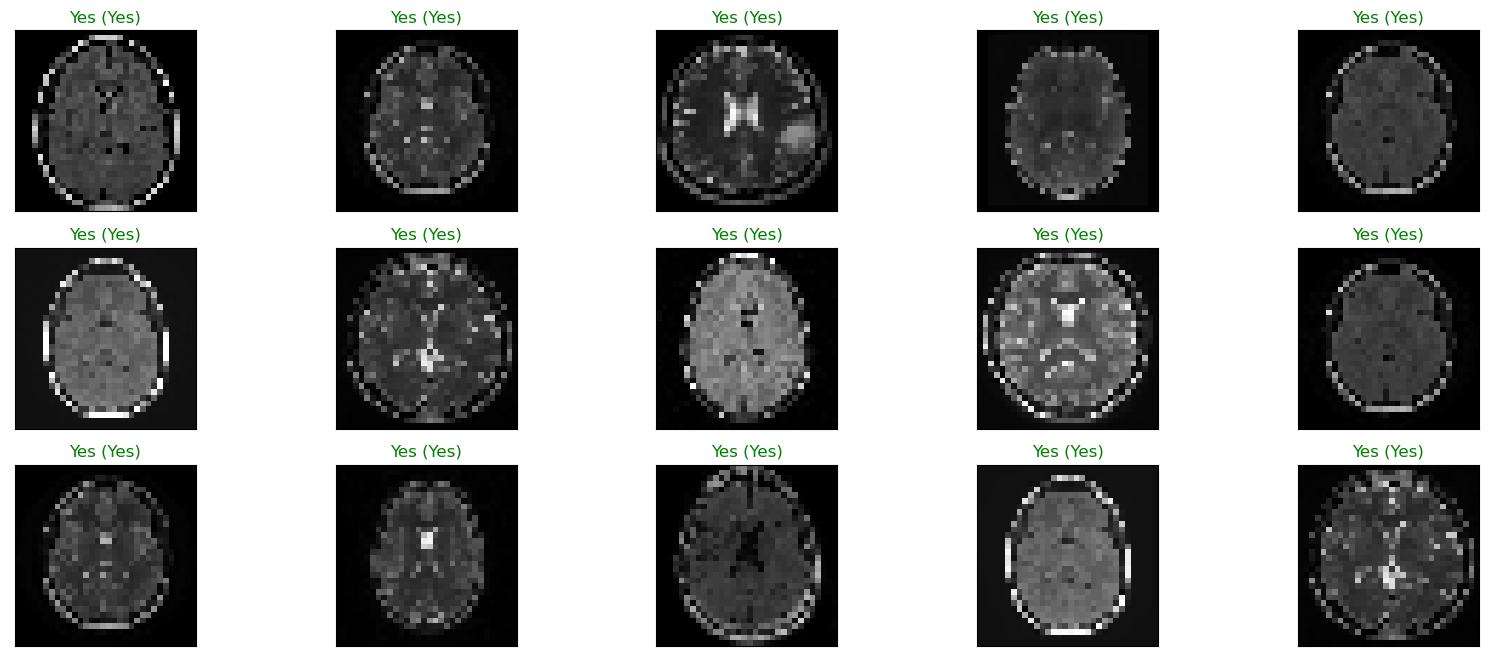

In [34]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()